In [2]:
import math
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from scipy.integrate import odeint


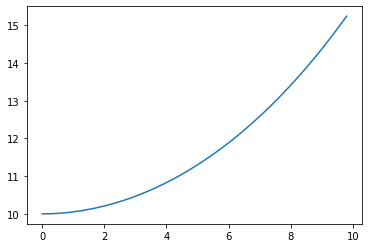

In [119]:
xt = [10]
t = [0]
k = -0.01

dt = .1
Vx = 0
for i in range(99):
    t.append(dt*i)
    a = -k*xt[i]
    xt.append(xt[i] + dt*Vx)
    Vx = Vx + dt*a
plt.plot(t,xt)

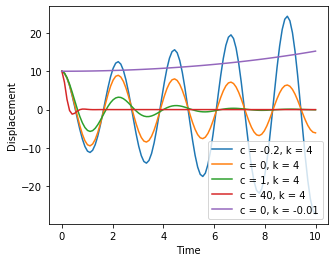

In [123]:
#from https://scipy-lectures.org/intro/scipy/auto_examples/plot_odeint_damped_spring_mass.html
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = .1  # N s/m


eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)


def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

time_vec = np.linspace(0, 10, 100)
yinit = (10, -1)
y_0 = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

#Line with negative damping
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = -.2  # N s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

y_neg = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

#Line with positive damping
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 1 # N s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

y_pos = odeint(calc_deri, yinit, time_vec, args=(eps, omega))


mass = 0.5  # kg
kspring = 40  # N/m
cviscous = 10 # N s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

y_high = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

plt.figure(figsize=(5, 4))
plt.plot(time_vec, y_neg[:, 0], label='c = -0.2, k = 4')
plt.plot(time_vec, y_0[:, 0], label='c = 0, k = 4')
plt.plot(time_vec, y_pos[:, 0], label='c = 1, k = 4')
plt.plot(time_vec, y_high[:, 0], label='c = 40, k = 4')
plt.plot(time_vec, xt, label='c = 0, k = -0.01')
# plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.savefig("Spring_with_damping.pdf")

##### Another way of showing damping (from https://anaconda.org/ijstokes/13-scientificpython/notebook)

In [75]:
from matplotlib.pyplot import subplots
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [121]:
# initial state: 
y0 = [1.0, 0.0]
# time coordinate to solve the ODE for
t = linspace(0, 5, 1000)
w0 = 2*pi*1.0

# solve the ODE problem for three different values of the damping ratio
y1 = odeint(dy, y0, t, args=(0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped


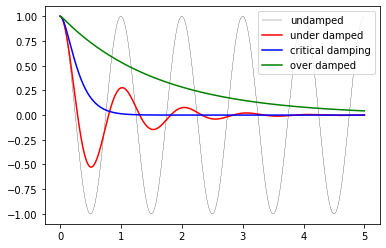

In [122]:
fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend(loc='best');